Upload Dataset

In [36]:
from google.colab import files
uploaded = files.upload()

Saving Student_Reviews.csv to Student_Reviews (1).csv


Read and Preview the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Student_Reviews.csv', encoding='ISO-8859-1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


Clean & Prepare the Data

In [ ]:
#Clean column name
df.columns = df.columns.str.strip()

#Drop unnecessary columns
df.drop(columns=['SN', 'Total Feedback Given', 'Total Configured'], inplace=True, errors='ignore')

#Split 'Average/ Percentage' into two separate numeric columns
df[['Average', 'Percentage']] = df['Average/ Percentage'].str.extract(r'([\d.]+)\s*/\s*([\d.]+)').astype(float)

#Reorder columns
df = df[['Questions', 'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5',
         'Average', 'Percentage', 'Course Name', 'Basic Course']]

df.head()

,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average,Percentage,Course Name,Basic Course
0,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.0,60.0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,How well did the teachers prepare for the clas...,0,0,0,0,1,5.0,100.0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,How well were the teachers able to communicate?,0,0,0,0,1,5.0,100.0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,The teachers approach to teaching can best be...,0,0,1,0,0,3.0,60.0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,Fairness of the internal evaluation process by...,0,0,0,1,0,4.0,80.0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


Analyze Ratings & Identify Insights

In [37]:
#Top 5 questions by average rating
top_questions = df[['Questions', 'Average']].sort_values(by='Average', ascending=False).head(5)
top_questions

,Questions,Average
11,The teachers illustrate the concepts through e...,5.0
20,How much of the syllabus was covered in the cl...,5.0
1,How well did the teachers prepare for the clas...,5.0
229,Teachers inform you about your expected compet...,5.0
231,The teachers illustrate the concepts through e...,5.0


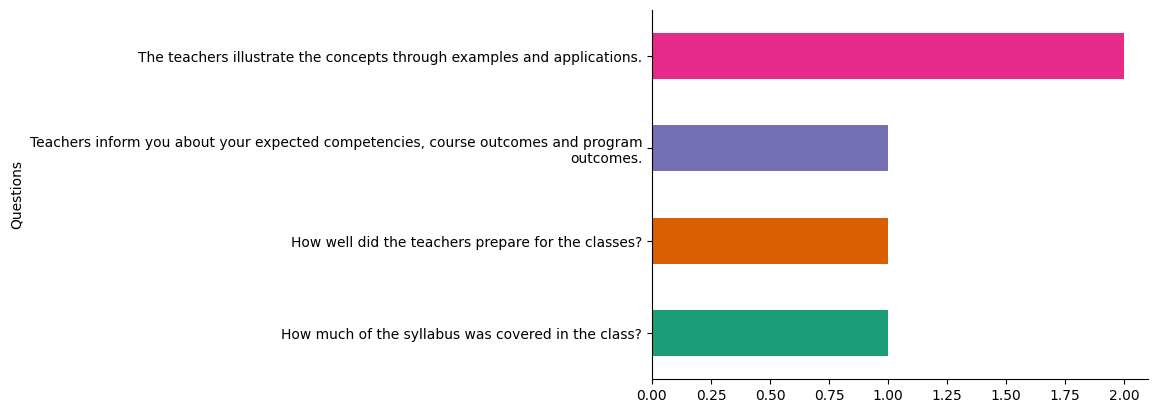

In [ ]:
#Plotting top 5 questions by average rating
from matplotlib import pyplot as plt
import seaborn as sns
top_questions.groupby('Questions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
#Bottom 5 questions by average rating
low_questions = df[['Questions', 'Average']].sort_values(by='Average', ascending=True).head(5)
low_questions


,Questions,Average
207,The teaching and mentoring process in your ins...,1.33
212,The teachers identify your strengths and encou...,1.33
211,The teachers illustrate the concepts through e...,1.67
550,Your mentor does a necessary follow-up with an...,2.00
12,The teachers identify your strengths and encou...,2.00


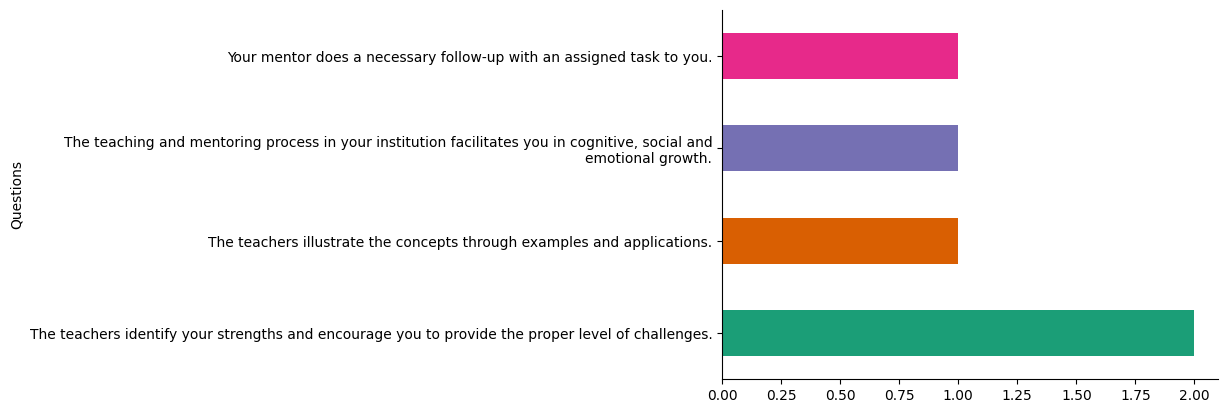

In [ ]:
#Plotting bottom 5 questions by average rating
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Questions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Average Rating Distribution

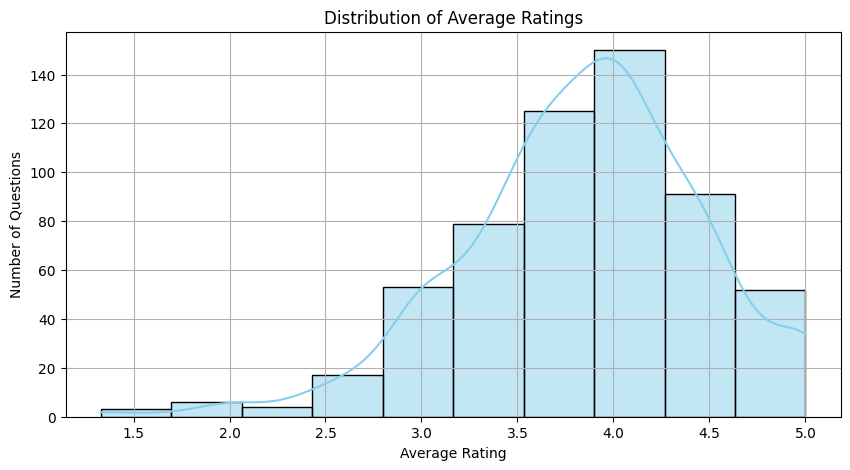

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['Average'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Questions')
plt.grid(True)
plt.show()

Average Rating by Course

/tmp/ipython-input-26-2992160796.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wrapped_labels, y=course_avg.values, palette='viridis')


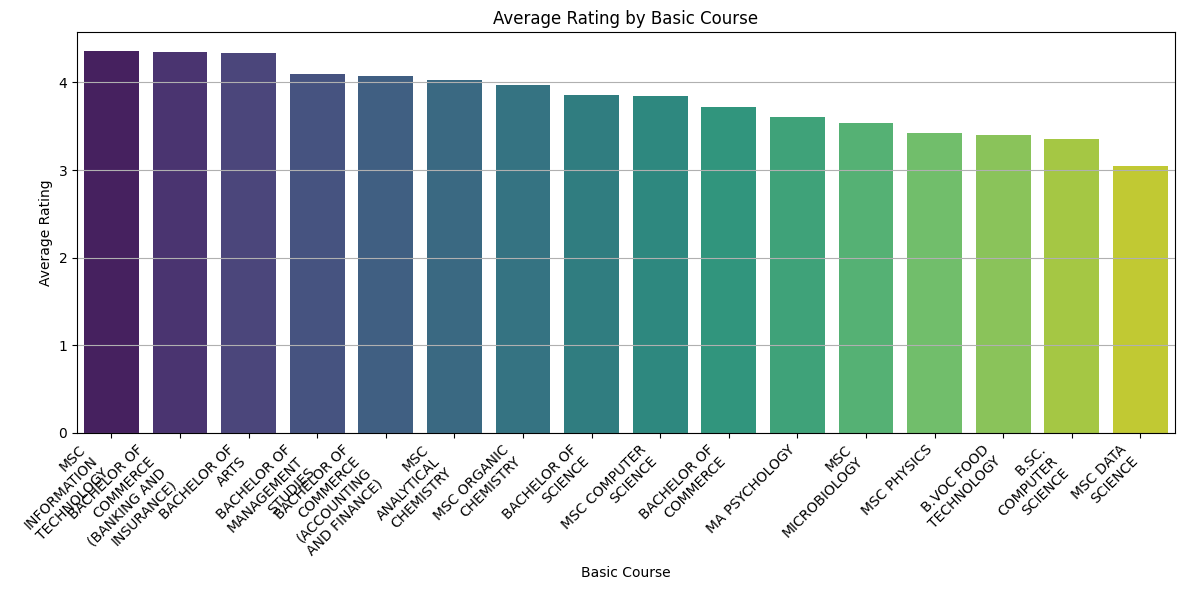

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Group & sort
course_avg = df.groupby('Basic Course')['Average'].mean().sort_values(ascending=False)

# Wrap long labels
wrapped_labels = [textwrap.fill(label, width=13) for label in course_avg.index]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=wrapped_labels, y=course_avg.values, palette='viridis')

plt.title('Average Rating by Basic Course')
plt.ylabel('Average Rating')
plt.xlabel('Basic Course')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


Total Ratings per Score (1–5)

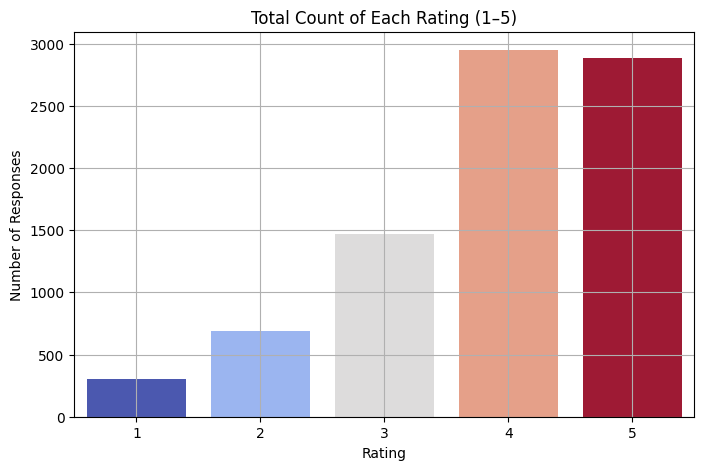

In [ ]:
# Prepare the data
rating_counts = df[['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']].sum()
rating_data = rating_counts.reset_index()
rating_data.columns = ['Rating', 'Count']
rating_data['Rating'] = rating_data['Rating'].str.extract(r'(\d)').astype(int)

plt.figure(figsize=(8, 5))
sns.barplot(data=rating_data, x='Rating', y='Count', hue='Rating', palette='coolwarm', legend=False)
plt.title("Total Count of Each Rating (1–5)")
plt.ylabel("Number of Responses")
plt.xlabel("Rating")
plt.grid(True)
plt.show()


Rating Proportions

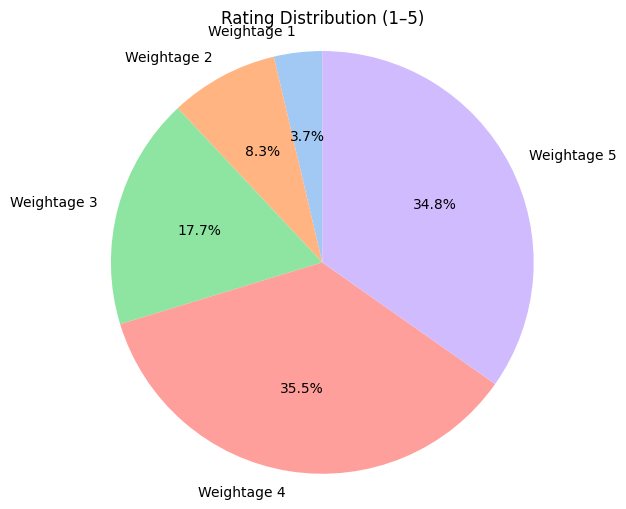

In [ ]:
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Rating Distribution (1–5)')
plt.axis('equal')
plt.show()


#**Actionable Strategies Based on Student Feedback Analysis**

Following the analysis of student feedback across multiple dimensions, here are targeted strategies designed to improve the learning experience, especially in areas that received lower satisfaction ratings.


###1. Clarity in Evaluation Criteria

**Issue Identified:** Students expressed concerns about fairness and transparency in evaluations.

**Strategy:** Improve clarity and consistency in assessment practices.

**Action Steps:**
- Provide clear grading rubrics before assessments.
- Conduct short briefings to explain evaluation criteria.
- Offer optional feedback sessions after major assessments.
- Use peer reviews and double-checking to ensure fairness.


###2. Interactive Teaching Techniques

**Issue Identified:** Average ratings for classroom engagement and teaching approach.

**Strategy:** Adopt interactive and student-centered teaching methods.

**Action Steps:**
- Use polls, quizzes, and group activities during lectures.
- Introduce gamified or case-based learning.
- Rotate between lectures, demonstrations, and discussions.
- Encourage real-time feedback during class.


###3. Curriculum Relevance & Practical Application

**Issue Identified:** Moderate scores for the real-world relevance of course content.

**Strategy:** Align curriculum with industry trends and student interests.

**Action Steps:**
- Incorporate real-life case studies and guest lectures.
- Map theoretical concepts to current tools and practices.
- Introduce optional modules or capstone projects.
- Engage students in identifying relevant improvements.


###4. Instructor Accessibility Outside Class

**Issue Identified:** Some students found it difficult to get help or clarification after class.

**Strategy:** Enhance academic support channels outside lectures.

**Action Steps:**
- Set consistent office hours or virtual Q&A slots.
- Create shared discussion boards or online forums.
- Appoint teaching assistants or peer mentors.
- Encourage use of anonymous question boxes.


###5. Improved Use of Presentations & Learning Aids

**Issue Identified:** Presentation quality and material clarity were rated lower in some areas.

**Strategy:** Standardize and modernize content delivery tools.

**Action Steps:**
- Use clean and visually engaging slides.
- Offer notes or slide decks before or after sessions.
- Include diagrams and flowcharts for complex topics.
- Regularly collect feedback on teaching materials.


###**Next Steps: From Feedback to Action**

1. **Share Insights:** Present key findings to faculty and coordinators.  
2. **Pick Priorities:** Focus on 2–3 improvement areas per term.  
3. **Test Ideas:** Pilot strategies in select classes.  
4. **Track Progress:** Collect follow-up feedback to measure change.  
5. **Refine & Scale:** Expand what works, adjust what doesn’t.

---

> *Small steps, big impact — let feedback shape the future*





